**Slooze Challenge -- Data Science Analytics**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Dataset**

In [4]:
purchase_prices=pd.read_csv('/content/2017PurchasePricesDec.csv')
begin_inventory=pd.read_csv('/content/BegInvFINAL12312016.csv')
end_inventory=pd.read_csv('/content/EndInvFINAL12312016.csv')
invoice_purchases=pd.read_csv('/content/InvoicePurchases12312016.csv')
purchases_final=pd.read_csv('/content/PurchasesFINAL12312016.csv')
sales=pd.read_csv('/content/SalesFINAL12312016.csv')

**Basic Structure of Data**

In [5]:
purchase_prices.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [6]:
begin_inventory.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [7]:
end_inventory.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [8]:
invoice_purchases.head()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN


In [9]:
purchases_final.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412.0,Tequila Ocho Plata Fresno,750mL,105.0,ALTAMAR BRANDS LLC,8124.0,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6.0,214.26,1.0
1,30_CULCHETH_5255,30,5255.0,TGI Fridays Ultimte Mudslide,1.75L,4466.0,AMERICAN VINTAGE BEVERAGE,8137.0,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4.0,37.40,1.0
2,34_PITMERDEN_5215,34,5215.0,TGI Fridays Long Island Iced,1.75L,4466.0,AMERICAN VINTAGE BEVERAGE,8137.0,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5.0,47.05,1.0
3,1_HARDERSFIELD_5255,1,5255.0,TGI Fridays Ultimte Mudslide,1.75L,4466.0,AMERICAN VINTAGE BEVERAGE,8137.0,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6.0,56.10,1.0
4,76_DONCASTER_2034,76,2034.0,Glendalough Double Barrel,750mL,388.0,ATLANTIC IMPORTING COMPANY,8169.0,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5.0,106.60,1.0


In [71]:
sales.head(10)

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName,Month
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-01,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,2016-01
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2016-01-02,750,1,1.57,12546,JIM BEAM BRANDS COMPANY,2016-01
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-03,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,2016-01
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2016-01-08,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,2016-01
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2016-01-09,375,1,0.79,12546,JIM BEAM BRANDS COMPANY,2016-01
5,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,1,34.99,34.99,2016-01-15,375,1,0.39,12546,JIM BEAM BRANDS COMPANY,2016-01
6,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,1,34.99,34.99,2016-01-22,375,1,0.39,12546,JIM BEAM BRANDS COMPANY,2016-01
7,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,1,34.99,34.99,2016-01-30,375,1,0.39,12546,JIM BEAM BRANDS COMPANY,2016-01
8,1_HARDERSFIELD_10058,1,10058,F Coppola Dmd Ivry Cab Svgn,750mL,4,59.96,14.99,2016-01-05,750,2,0.45,2000,SOUTHERN WINE & SPIRITS NE,2016-01
9,1_HARDERSFIELD_10058,1,10058,F Coppola Dmd Ivry Cab Svgn,750mL,1,14.99,14.99,2016-01-06,750,2,0.11,2000,SOUTHERN WINE & SPIRITS NE,2016-01


**Demand Forecasting** --
**Sales Demand for Top Product**

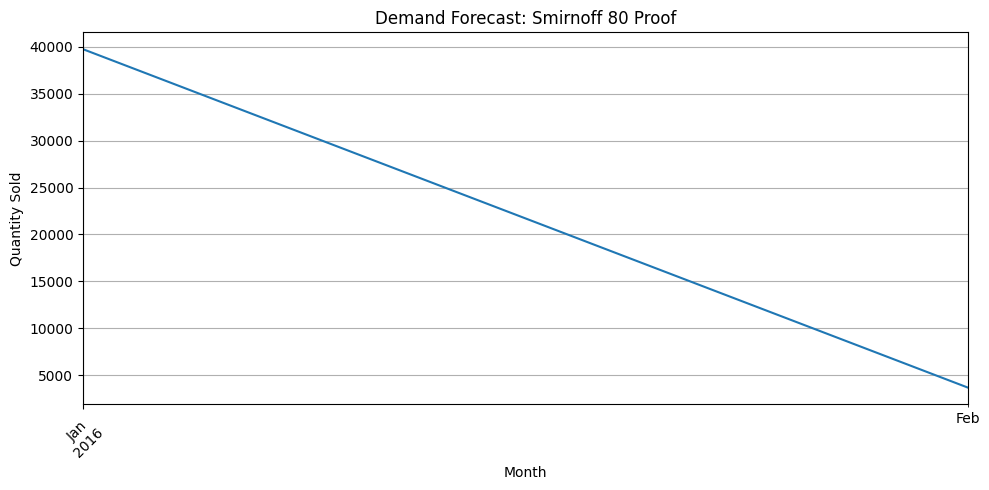

In [11]:
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])
sales['Month'] = sales['SalesDate'].dt.to_period('M')
monthly_sales = sales.groupby(['Description', 'Month'])['SalesQuantity'].sum().reset_index()
top_product = monthly_sales.groupby('Description')['SalesQuantity'].sum().idxmax()
product_data = monthly_sales[monthly_sales['Description'] == top_product]
product_data.set_index('Month')['SalesQuantity'].plot(figsize=(10,5), title=f'Demand Forecast: {top_product}')
plt.xlabel('Month'); plt.ylabel('Quantity Sold'); plt.xticks(rotation=45);plt.grid(True); plt.tight_layout(); plt.show()

**ABC Analysis**

In [32]:
# Merge price info into sales data
df = sales.merge(purchase_prices[['Description', 'Price']], on='Description', how='left')

# Calculate value = quantity × cost
df['Value'] = df['SalesQuantity'] * df['SalesPrice']

# Group by product
abc_data = df.groupby('Description')['Value'].sum().reset_index()
abc_data = abc_data.sort_values(by='Value', ascending=False)

In [34]:
# Total value
total_value = abc_data['Value'].sum()

# Cumulative % of total value
abc_data['CumulativePercent'] = abc_data['Value'].cumsum() / total_value * 100

In [35]:
def abc_category(percent):
    if percent <= 80:
        return 'A'
    elif percent <= 95:
        return 'B'
    else:
        return 'C'

abc_data['Category'] = abc_data['CumulativePercent'].apply(abc_category)

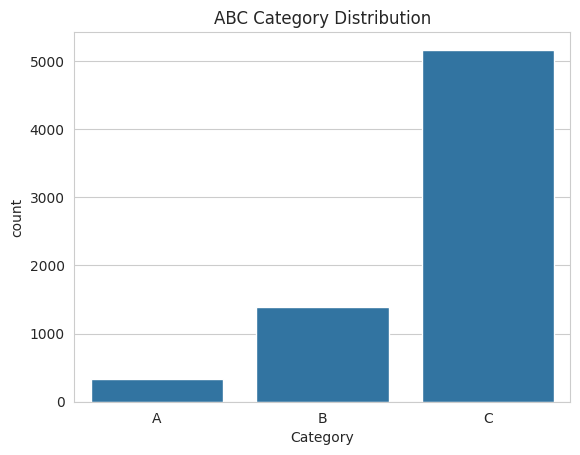

In [49]:
sns.countplot(data=abc_data, x='Category', order=['A', 'B', 'C'])
plt.title("ABC Category Distribution")
plt.show()

**Economic Order Quantity (EOQ) Analysis**

In [58]:
# Merge cost data into sales
df = sales.merge(purchase_prices[['Description', 'Price']], on='Description', how='left')

# Calculate annual demand per product
demand = df.groupby('Description')['SalesQuantity'].sum().reset_index()
demand.columns = ['Description', 'AnnualDemand']

# Merge cost
demand = demand.merge(purchase_prices[['Description', 'Price']], on='Description', how='left')

# Assumed constants
ordering_cost = 500              # Cost per order
holding_cost_rate = 0.20         # 20% of cost per unit per year

# Calculate holding cost per unit
demand['HoldingCost'] = demand['Price'] * holding_cost_rate

# EOQ formula
demand['EOQ'] = np.sqrt((2 * demand['AnnualDemand'] * ordering_cost) / demand['HoldingCost'])

# Calculate total cost for evaluation
demand['TotalOrderingCost'] = (demand['AnnualDemand'] / demand['EOQ']) * ordering_cost
demand['TotalHoldingCost'] = (demand['EOQ'] / 2) * demand['HoldingCost']
demand['TotalInventoryCost'] = demand['TotalOrderingCost'] + demand['TotalHoldingCost']

**Just-In-Time Inventory Check**

In [61]:
# Daily & monthly demand
demand['DailyDemand'] = demand['AnnualDemand'] / 365
demand['MonthlyDemand'] = demand['AnnualDemand'] / 12

# Feasibility of JIT: order small EOQ more frequently than monthly demand
demand['JIT_Feasible'] = demand['EOQ'] < demand['MonthlyDemand']

# View products where JIT is possible
jit_products = demand[demand['JIT_Feasible'] == True]
jit_products[['Description', 'AnnualDemand', 'EOQ', 'MonthlyDemand']]

,Description,AnnualDemand,EOQ,MonthlyDemand
83,Absolut 80 Proof,115855,5132.509693,9654.583333
84,Absolut 80 Proof,115855,5839.097183,9654.583333
85,Absolut 80 Proof,115855,6434.777517,9654.583333
86,Absolut 80 Proof,115855,4814.589506,9654.583333
226,Amaretto DiSaronno,32175,2242.524311,2681.250000
...,...,...,...,...
7372,Tito's Handmade Vodka,100625,4579.550209,8385.416667
7617,Veuve Clicquot Brut Yellow,6276,360.476447,523.000000
7898,Yukon Jack,96148,5319.348449,8012.333333
7899,Yukon Jack,96148,4300.827162,8012.333333


**EOQ V/S Monthly Demand**

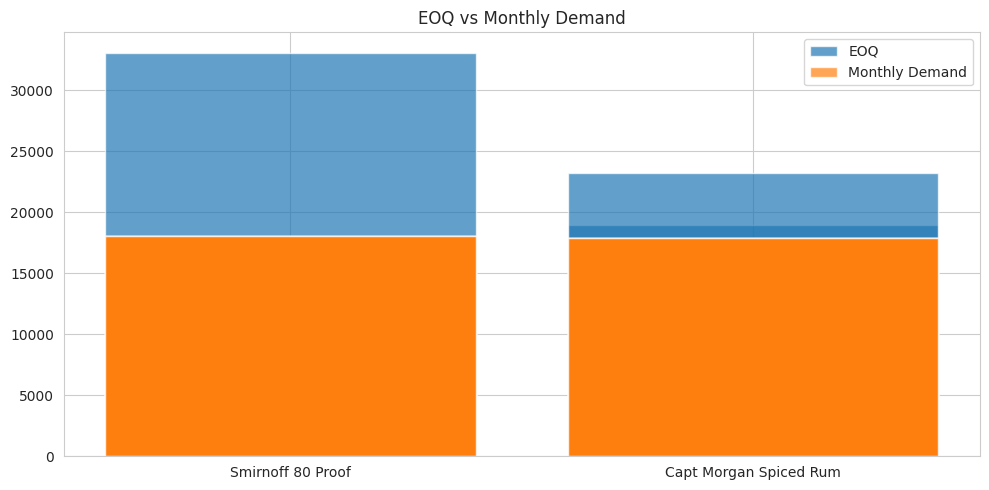

In [66]:
sample = demand.sort_values(by='AnnualDemand', ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.bar(sample['Description'], sample['EOQ'], label='EOQ', alpha=0.7)
plt.bar(sample['Description'], sample['MonthlyDemand'], label='Monthly Demand', alpha=0.7)
plt.title("EOQ vs Monthly Demand")
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

**Reorder Point Analysis**

In [84]:
# Preprocess prices
prices = purchase_prices.rename(columns={'Description': 'ProductName', 'price': 'Cost'})

# Calculate annual and daily demand
demand = sales.groupby('Description')['SalesQuantity'].sum().reset_index()
demand.columns = ['ProductName', 'AnnualDemand']
demand['DailyDemand'] = demand['AnnualDemand'] / 365

# Assume lead time (in days)
demand['LeadTime'] = 7

# Optional: Add safety stock buffer (e.g., 20% of daily demand * lead time)
demand['SafetyStock'] = demand['DailyDemand'] * demand['LeadTime'] * 0.20

# Step 3: Calculate reorder point
demand['ReorderPoint'] = (demand['DailyDemand'] * demand['LeadTime']) + demand['SafetyStock']

# Step 4: Merge product cost for completeness
demand = demand.merge(prices[['ProductName', 'Price']], on='ProductName', how='left')

# Step 5: Final Output
reorder_table = demand[['ProductName', 'AnnualDemand', 'DailyDemand', 'LeadTime', 'SafetyStock', 'ReorderPoint']]
reorder_table = reorder_table.sort_values(by='ReorderPoint', ascending=False)

# Display top 10 products by reorder point
reorder_table.head(10)

,ProductName,AnnualDemand,DailyDemand,LeadTime,SafetyStock,ReorderPoint
6661,Smirnoff 80 Proof,43423,118.967123,7,166.553973,999.323836
6660,Smirnoff 80 Proof,43423,118.967123,7,166.553973,999.323836
6663,Smirnoff 80 Proof,43423,118.967123,7,166.553973,999.323836
6662,Smirnoff 80 Proof,43423,118.967123,7,166.553973,999.323836
6664,Smirnoff 80 Proof,43423,118.967123,7,166.553973,999.323836
1348,Capt Morgan Spiced Rum,35866,98.263014,7,137.568219,825.409315
1349,Capt Morgan Spiced Rum,35866,98.263014,7,137.568219,825.409315
1350,Capt Morgan Spiced Rum,35866,98.263014,7,137.568219,825.409315
1352,Capt Morgan Spiced Rum,35866,98.263014,7,137.568219,825.409315
1351,Capt Morgan Spiced Rum,35866,98.263014,7,137.568219,825.409315


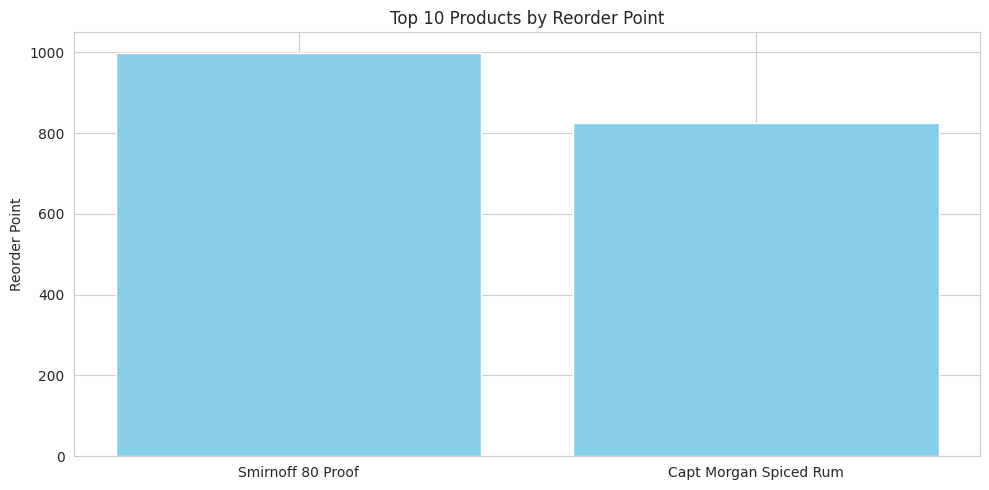

In [90]:
top_10 = reorder_table.head(10)

plt.figure(figsize=(10,5))
plt.bar(top_10['ProductName'], top_10['ReorderPoint'], color='skyblue')

plt.title("Top 10 Products by Reorder Point")
plt.ylabel("Reorder Point")
plt.tight_layout()
plt.show()

**Lead Time Analysis**

In [118]:
purchases_final.head(2)

,InventoryId,Store,Brand,ProductName,Size,VendorNumber,VendorName,PONumber,PurchaseDate,DeliveryDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification,LeadTime
0,69_MOUNTMEND_8412,69,8412.0,Tequila Ocho Plata Fresno,750mL,105.0,ALTAMAR BRANDS LLC,8124.0,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6.0,214.26,1.0,12.0
1,30_CULCHETH_5255,30,5255.0,TGI Fridays Ultimte Mudslide,1.75L,4466.0,AMERICAN VINTAGE BEVERAGE,8137.0,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4.0,37.40,1.0,10.0


In [116]:
# Renaming Column
purchases_final.rename(columns={'Description': 'ProductName','PODate':'PurchaseDate','ReceivingDate':'DeliveryDate'},inplace=True)
print(purchases_final.columns)

Index(['InventoryId', 'Store', 'Brand', 'ProductName', 'Size', 'VendorNumber',
       'VendorName', 'PONumber', 'PurchaseDate', 'DeliveryDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification'],
      dtype='object')


Top 10 products with highest average lead time:
                       ProductName  LeadTime
57          A Bichot Merc Champs M     13.00
2385         DeKuyper Peach Pucker     13.00
4333            La Fee NV Absinthe     13.00
6161  Rittenhouse Rye Bonded Whsky     13.00
2538    Dom Serene Roadblock Syrah     13.00
1753         Ch Rollan de By Medoc     13.00
2413             Debauchery Pnt Nr     13.00
5655      Permafrost Alaskan Vodka     12.25
4723      Maimai Hawke's Bay Syrah     12.00
7913                 Zonin Moscato     12.00


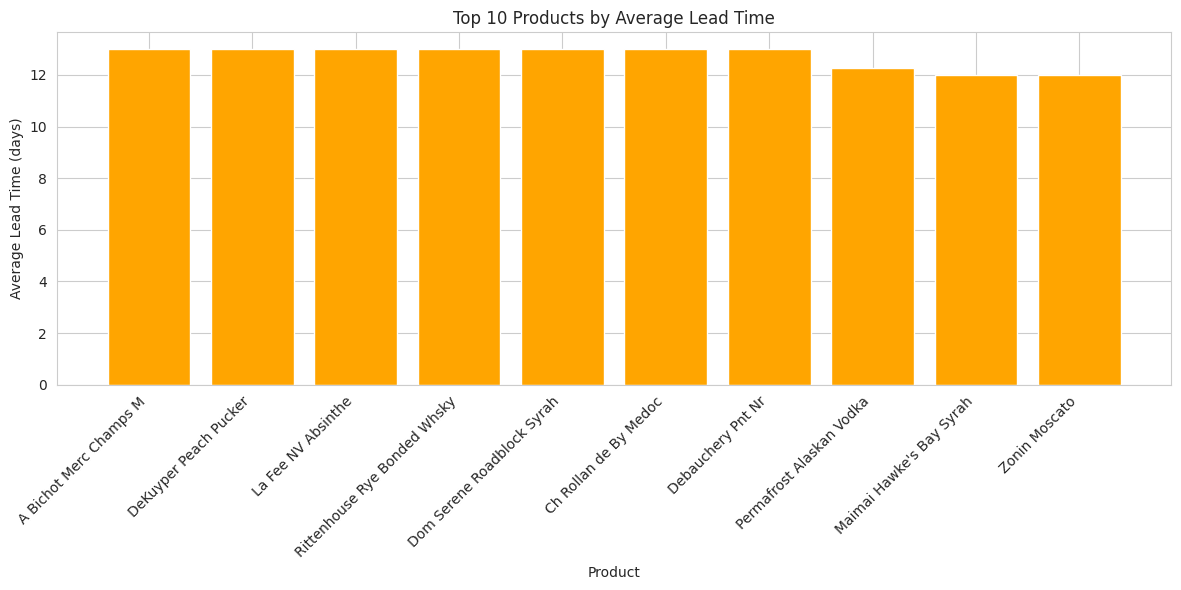

In [117]:
purchases_final['PurchaseDate'] = pd.to_datetime(purchases_final['PurchaseDate'])
purchases_final['DeliveryDate'] = pd.to_datetime(purchases_final['DeliveryDate'])

purchases_final['LeadTime'] = (purchases_final['DeliveryDate'] - purchases_final['PurchaseDate']).dt.days
purchases_final = purchases_final[purchases_final['LeadTime'].notnull() & (purchases_final['LeadTime'] >= 0)]

# Average lead time/product:
lead_time_by_product = purchases_final.groupby('ProductName')['LeadTime'].mean().reset_index()
lead_time_by_product = lead_time_by_product.sort_values(by='LeadTime', ascending=False)

# Top 10 slowest products:
print("Top 10 products with highest average lead time:")
print(lead_time_by_product.head(10))

# Visualization:
plt.figure(figsize=(12,6))
plt.bar(lead_time_by_product['ProductName'].head(10), lead_time_by_product['LeadTime'].head(10), color='orange')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Products by Average Lead Time")
plt.xlabel("Product")
plt.ylabel("Average Lead Time (days)")
plt.tight_layout()
plt.show()